# Inverse Transform Sampling

Need to understand:

- cumulative density function 
- inverse cumulative density function, also called the quantile function

## Cumulative Distribution Function (CDF)

>>The CDF of a random variable $X$ returns the probability of $X$ being smaller than or equal to some value $x$.
$$\begin{align}
\Pr(X\leq x) = F_X(x).
\end{align}$$

We will use the simplified notation $F(x)$ instead of $F_X(x)$. For instance, $F(-1.64) = 0.05$ means that the probably that X falls below $X=-1.64$ is about 0.05.

## Quantile Function 

>> A quantile function is the inverse of a CDF.
$$\begin{align} 
F^{-1}(\alpha) = \inf\{x: F(x) \geq \alpha\}, \quad 0< \alpha < 1.
\end{align}$$

It reads: $F^{-1}(\alpha)$ returns the value of $x$ which is the smallest ("$\inf$") value of all the possible $x$ that makes the $x$'s CDF (i.e., $F(x)$) greater than or equal to $\alpha$.

In the case of a normally distributed random variable, we often use $\Phi()$ to denote the CDF.

Suppose $\Phi(x)$ is the CDF of a normally distributed random variable $X$ at $X=x$.

- $\Phi(x)=\alpha$: The cumulative density of $X$ at the value of $x$ is $\alpha$.

  - E.g., $\Phi(-1.64) = 0.05$: The cumulative probability of $X$ at the value of $X=-1.64$ is $0.05$.


- $\Phi^{-1}(\alpha)$: The quantile function of $X$ at the CDF=$\alpha$. It denotes the (normal) random variable's value at the variable's $\alpha$-quantile.

  - E.g., $\Phi^{-1}(0.05)=-1.64$: The normal random variable's 5% quantile is $-1.64$.
  

## vs. probability density function

Note that the quantile function is not the same as the *probability density function* (PDF; $\phi()$ for a normal random variable). 
- "probability density" $\neq$ "probability": 
  - $\phi(X=-1.64) = 0.10396$ is the "probability density" of $X$ at $X=x$, which is not the "probability" of $X=x$.
 

- "probability": the integration of probability density. 
  - It is measured by the size of an area under the PDF. 
  - $X=-1.64$ is a point, and the size of this point's "area" under the PDF is 0, so the probability of $X=-1.64$ is 0.

- Put them together:
  - probability density: $\phi(X=-1.64) = 0.10396$ 
  - probability of $X=-1.64$ is 0.
  - cumulative probability: $\Phi(X=-1.64) = 0.05$.

Now we have one more way to get a value from a normal random variable: using the quantile function of the normal distribution. For $\Phi^{-1}(0.05)=-1.64$, the Julia code is:
 

In [2]:
using Distributions
x1 = quantile(Normal(0,1), 0.05)  # show using a vector; # hjw
@show x1;

x1 = -1.6448536269514724


Note that the obtained number is not *random*, since we asked for it given $\alpha=0.05$. It turns out to be very useful when we use low-discrepancy sequence to do Monte Carlo integration. Anyway, if you insist, you can still draw a random number this way:

In [3]:
x2 = quantile(Normal(0,1), rand())  # hjw # what if you use rand(1)? See if for yourself
@show x2;

x2 = -1.0604832167958724


In [9]:
# graph of α to xᵢ
using LaTeXStrings, Interact, Plots

x = range(-4, 4, length=500)
y = pdf.(Normal(0,1), x)

@manipulate for alpha in (0:0.025:1)    # alpha: significance level
  xi = round(quantile(Normal(0,1), alpha), digits=2)  # xi: corresponding x  # hjw
  x_shade = x .< xi
  plot(x[x_shade], y[x_shade], fillrange=zero(x[x_shade]), fc=:blues, label=L"\alpha=%$alpha")
  plot!(x, y, lc=:black, framestyle = :origin, xticks=[-4, xi, 4], 
        size = (650, 300), label=nothing)
  vline!([xi], color=:darkred, label=L"xi=%$xi")
end 

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["alpha"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 41, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
21, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\opott\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\opott\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000000d66d560, Task (runnable) @0x000000000d66d560), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.025\",\"0.05\",\"0.075\",\"0.1\",\"0.125\",\"0.15\",\"0.175\",\"0.2\",\"0.225\",\"0.25\",\"0.275\",\"0.3\",\"0.325\",\"0.35\",\"0.375\",\"0.4\",\"0.425\",\"0.45\",\"0.475\",\"0.5\",\"0.525\",\"0.55\",\

We need one more thing before we can do the sampling. It is called the *probability integral transformation*. 

>> **Probability Integral Transformation (PIT):** Let $X$ be a continuous random variable that has a CDF $F_X(x)$ which is also continuous. Because $X$ is a random variable, $F_X(X)$ is also random. If we define a random variable $Y$ as $Y=F_X(X)$, then $Y \sim U(0,1)$.

In plain language: Values from a continuous random variable's CDF are uniformly distributed in (0,1).

There is a slight twist, though:


- If the CDF is the $X$'s CDF, the result is exact.

  - E.g.: If $X$ has a normal distribution and $\Phi_X(x)$ is the CDF of a normal r.v., then $Y=\Phi_X(X)$ would be exactly $U(0,1)$.


- If the CDF is not $X$'s CDF, the result is approximately true in large samples.  

  - E.g.: If $Z$ has a $t$ distribution and $\Phi_X(X)$ is the CDF of a normal r.v., then $Y=\Phi_X(Z)$ would be $U(0,1)$ only in large samples.


The PIT is widely used in statistics, econometrics, and data science. 


- transforming a random variable $X$ into a $Y \sim U(0,1)$. 
  - a statistical test that is defined on $U(0,1)$, which may be applied to any $X$ by transforming $X$ into $Y\sim U(0,1)$.


- using a uniform random variable $Y \sim U(0,1)$ to generate $X$ that has the distribution function $F_X(x)$. 
  - inverse transformation sampling

Now we have all the tools to do the inverse transformation sampling.


- Recall that a CDF function takes as input some value $x$ and tells you what is the probability of obtaining $X\leq x$. So,

$$ F(x) = p.$$


- PIT tells us that $p\in P$ has a $U(0,1)$ distribution.


- As for the inverse function, which is also called the quantile function of $X$, it would take $p$ as input and return $x$:

$$F^{-1}(p) = x.$$

So, it is easy to sample values from $X$: Since $P\sim U(0,1)$, we draw values $p$ from $U(0,1)$, pass them through $F^{-1}(p)$ and get $x$ which would has the distribution of $F(x)$.


In [10]:
# using Distributions, Plots, LaTeXStrings
d = Normal(0,1)

@manipulate for xi in (-4:0.025:4)
  x_cdf = round(cdf(d, xi), digits=3)
  p1 = plot(d, framestyle=:origin, xticks=[xi], xlim=[-4,4], label="PDF", xlabel="X", lc=:black)
       vline!([xi], color=:darkred, label="xi", legend=:topleft)
  p2 = plot([xi,xi], [1.05,x_cdf], arrow=true, color=:darkred, label=L"xi=%$xi", ylim=[0,1])        
       plot!(x -> cdf(d, x), framestyle = :origin, xticks=[xi], xlim=[-4,4],
             yticks=[x_cdf], xlabel="X", label=L"\Phi(xi)",  lc=:black) 
       plot!([xi,0], [x_cdf,x_cdf], arrow=true, color=:orange, 
             label=L"\Phi(%$xi) = %$x_cdf", legend=:topleft, ylim=[0,1]) 
  plot(p1, p2, layout=(2,1))
end    

LoadError: Cannot convert Normal{Float64} to series data for plotting

In [15]:
# using Distributions, Plots
# experiment

d = Normal(0,1)

x = range(-4, 4, length=500)
y = pdf.(Normal(0,1), x)

@manipulate for ui in (0:0.01:1)         # CDF  
  xi = round(quantile(d, ui), digits=3)  # inverse CDF  # hjw
  x_shade = x .< xi  
  p3 = plot([0,xi], [ui,ui], arrow=true, color=:orange, label=L"U(0,1)=%$ui") 
       plot!(x -> cdf(d, x), framestyle=:origin, xticks=[xi], xlim=[-4,4],
             yticks=[0, ui, 1], label=L"\Phi(x)", xlabel="xi", lc=:black)   
       plot!([xi,xi], [ui+0.05,0], arrow=true, color=:darkred, 
             label=L"\Phi^{-1}(%$ui) = %$xi", legend=:topleft)                 
  p4=plot(x[x_shade], y[x_shade], fillrange = zero(x[x_shade]), fc=:blues, 
          label=L"ui=%$ui")
  plot!(x, y, lc=:black, framestyle = :origin, xticks=[-4, xi, 4], 
        label=nothing)
  vline!([xi], color=:darkred, label=L"\Phi^{-1}(%$ui) = %$xi")
  plot(p3, p4, layout=(2,1), size=(700,500))
end   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["ui"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\hjw48\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\hjw48\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\hjw48\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\hjw48\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\hjw48\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000000751207d0, Task (runnable) @0x00000000751207d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"

###### Example (simulating an exponential random variable)

We show how to generate random variables that has an exponential distribution with mean $\tau$.

An exponential random variable $X$ with the PDF of $f(x, \lambda) = \lambda e^{-\lambda x}$ has the mean and the standard deviation both equal to $\frac{1}{\lambda}$. Let's assume $\lambda=1$ so that the mean and the standard deviation of $X$ are both $1$. 

The corresponding CDF is $F(x) = 1-e^{-x}$. 

Now, what would be the quantile function? Recall that the quantile function $F^{-1}(p)$ would return a value of $x$ such that 

$$\begin{align}
1-e^{-x}=p.
\end{align}$$
According to PIT, $p\in P$ is $U(0,1)$. 

Solving for $x$, we have

$$\begin{align}
x = -\ln(1-p).
\end{align}$$

Thus,

$$\begin{aligned}
F^{-1}(p) = -\ln(1-p)
\end{aligned}$$

would generate an exponential random variable with mean equal to $1$.

Note that because $P \sim U(0,1)$, we have $1-P \sim U(0,1)$ as well. Therefore, the term `(1-p)` in the above equation could be replaced by `p` since both of them are uniform random variables in (0,1). That is, we could also use the following function to generate values from an exponential distribution with mean and standard deviation equal to 1:

$$\begin{aligned}
\mathrm{dgp}\_\mathrm{expo}(p) = -\ln(p).
\end{aligned}$$

How do we go from here to draw exponentially distributed random values with mean equal to $\tau$? Since $\tau X$ is exponential with mean $\tau$ if $X$ is exponential with mean $1$, it follows that $-\tau\ln(p)$ is exponential with mean $\tau$.

In [20]:
# do a simple demo here; testing the mean and the std.dev.

aa = -log.(rand(10000))
using Statistics
[mean(aa) std(aa)]

bb = 0.8*aa
[mean(bb) std(bb)]




1×2 Matrix{Float64}:
 0.809458  0.812476

Now suppose you want to transform a random variable $X$ from a distribution to a totally different distribution. How would you do that? Intuitively, the procedure is 

$$\begin{align}
 X \rightarrow \mbox{Uniform} \rightarrow Z.
\end{align}$$

The first arrow is by way of the CDF of $X$, and the second arrow is via the quantile function of $Z$.

In the following example, we demonstrate how to transform a variable $X \sim F_X(X)$ (e.g., a normal random variable) to $Z \sim F_Z(Z)$ (e.g., an exponential random variable).

We do in the following steps:
- take a random sample `X` of $n$ measurements from $N(1,2)$;
  - draw a histogram of `X` and compare it to a $N(1,2)$;
- transform `X` to `Y ~ U(0,1)`;
  - draw a histogram of `Y` and compare it to a $U(0,1)$;
- transform `Y` to `Z ~ Exp(2)` (where mean=standard deviation=1/2) using an appropriate quantile function;
  - draw a histogram of `Z` and compare it to a Exp$(2)$.

1×2 Matrix{Float64}:
 0.975611  2.02899

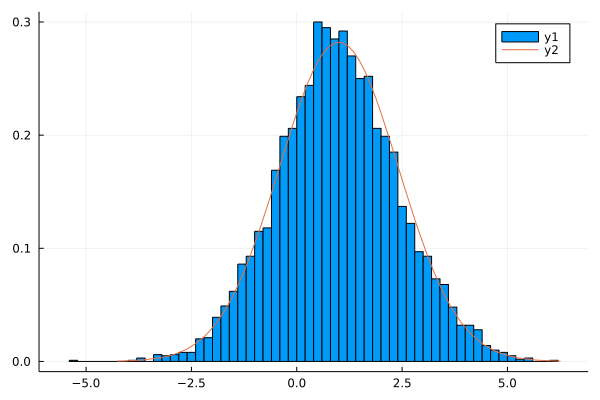

In [12]:
using Statistics
d_N12 = Normal(1, sqrt(2))      # Normal(mean, std.dev)
n = 5_000;
X = randn(n)*sqrt(2) .+ 1   # may add rng; discuss the issue of random seed  # hjw
[mean(X) var(X)] |> display

histogram(X, normalize=true, bins=100)
plot!(d_N12)

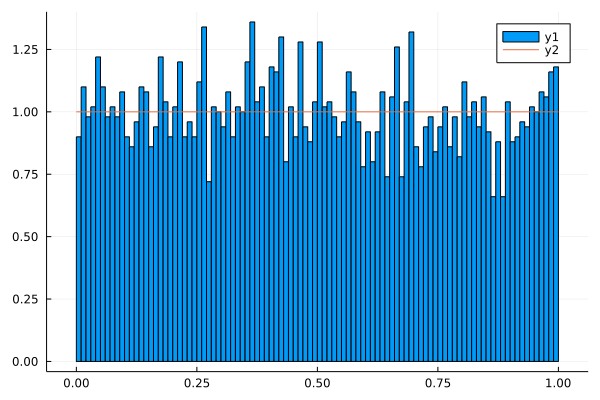

In [13]:
# transform X to Y~U(0,1)
Y  = cdf(d_N12, X)

histogram(Y, normalize=true, bins=100)
plot!(Uniform(0,1))


1×2 Matrix{Float64}:
 1.98077  2.03506

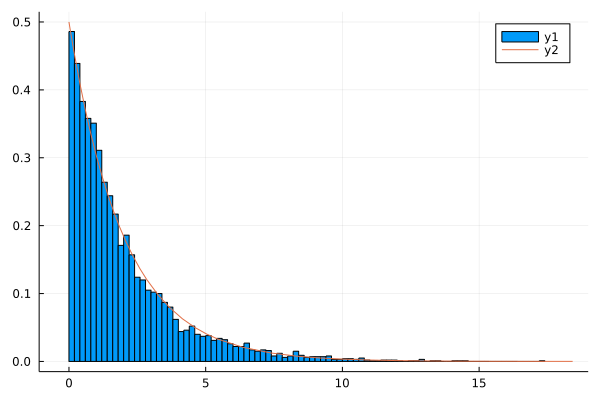

In [14]:
d_E2 = Exponential(2)
Z = quantile(d_E2, Y)  # should also try manully coding the quantile function
[mean(Z) std(Z)] |> display

histogram(Z, normalize=true, bins=100)
plot!(d_E2)

## Use LDS  in inverse transformation sampling (LDS)

We will discuss this part in numerical integrations.

# Other Comments

- Don't assume random numbers will be the same between Julia versions. See the [doc](https://docs.julialang.org/en/v1.5/stdlib/Random/) here. That is, if you apply the same code `myrandom = rand(MersenneTwister(123), 10)` to different versions of Julia, you'll get different `myrandom`, even if you've specified the local RNG. This may cause problems because you may not be able to reproduce the exact same results of your program after your Julia is upgraded. So, at least you have to document your version of Julia in your results. (BTW, different OS, different types of CPUs, may also have influences on numerical details. Documentation is important.)


- If you want random numbers to be the same between versions use [StableRNGs](https://juliahub.com/ui/Packages/StableRNGs/fu6AW/1.0.0). For instance, `rng = StableRNG(seed::Integer)`.

  - ```julia
using StableRNGs  
rng = StableRNG(123)
A = randn(rng, 10, 10) # instead of randn(10, 10)
@test inv(inv(A)) ≈ A  # if not random, may not be inverted because of deficient rank
x = [1.1, 2.2, 3.1, 4.5, 5.3, 6.1, 4.4, 3.2, 2.9, 9.0] # any vector of 10
@test A \ (A*x) ≈ x   # another test of RNG
```

- StableRNG is currently an alias for LehmerRNG, and implements a well understood linear congruential generator (LCG); an LCG is not state of the art, but is fast and is believed to have reasonably good statistical properties.


- The StableRNG is not as good as MersenneTwister or Xoshiro, but it is simple and less pron to problems.


- Starting from Julia 1.7, the default RNG is switched from from MersenneTwister to Xoshiro (a much faster and easier to parallelize pseudo RNG; also has better statistical properties). Julia 1.7 will also have a different RNG object per task, which will also change the stream of random numbers. 


- Also note that due to performance improvements and improvements to numerical accuracy, exact bitpatterns for floating point results are not guaranteed between versions.


- If students have learned Stata, ask some of them to do a presentation on DataFrames vs. Stata, also introducing DataFramesMeta (and something like that). Resources [here](https://dataframes.juliadata.org/stable/man/comparisons/), [here](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html), [here](https://ahsmart.com/assets/pages/data-wrangling-with-data-frames-jl-cheat-sheet/DataFramesCheatSheet_v0.21_rev3.pdf), and [here](https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf).
